Iris Flower Prediction using Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/iris.csv',header=None)
df.columns=['SL','SW','PL','PW','Target']
df

,SL,SW,PL,PW,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Target'].value_counts()

,count
Target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [4]:
df.shape

(150, 5)

In [5]:
df.describe() #Statistic Properties

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum() # missing value check

,0
SL,0
SW,0
PL,0
PW,0
Target,0


In [7]:
df.info() # categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='Target', ylabel='count'>

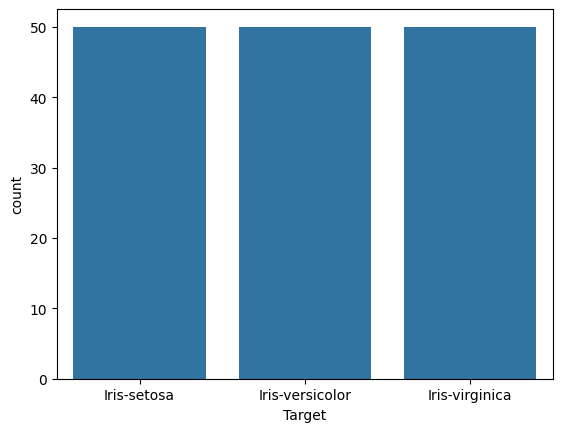

In [8]:
import seaborn as sns
sns.countplot(x=df['Target'])

<Axes: >

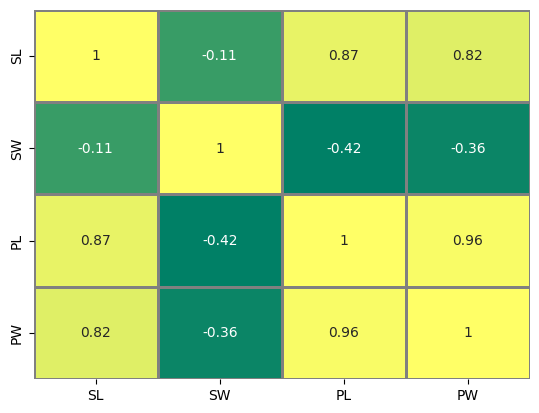

In [9]:
c=df[['SL','SW','PL','PW']].corr()
sns.heatmap(c, annot=True, cbar=False, cmap='summer', linewidth=2, linecolor='grey')

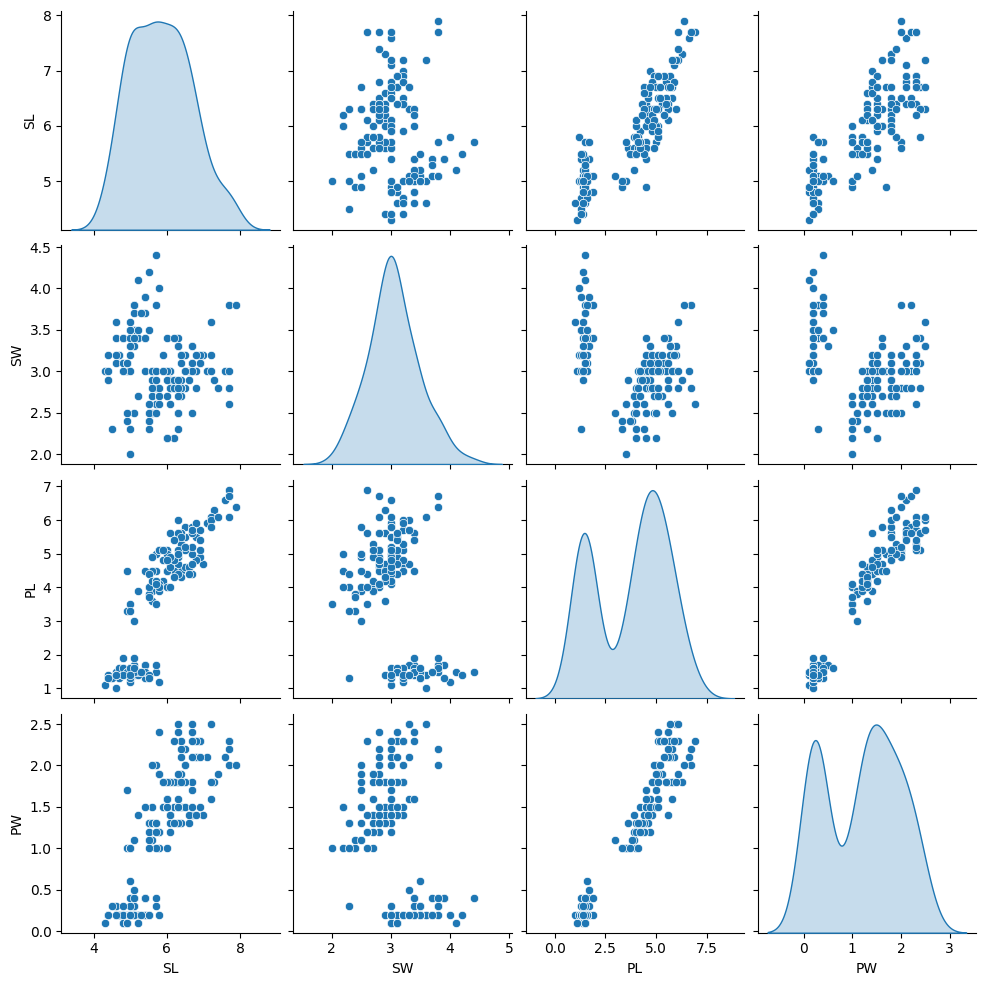

In [10]:
#EDA
sns.pairplot(df[['SL','SW','PL','PW']], diag_kind='kde') #probability density function

In [11]:
di={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Target']=df['Target'].map(di)


In [12]:
df['Target'].value_counts()

,count
Target,
0,50
1,50
2,50


In [13]:
y=df['Target']
x=df.drop(['Target'], axis=1)
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
train_acc= accuracy_score(y_train,y_train_pred)
test_acc= accuracy_score(y_test,y_test_pred)
print(train_acc)
print(test_acc)

0.9714285714285714
0.9333333333333333


In [18]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



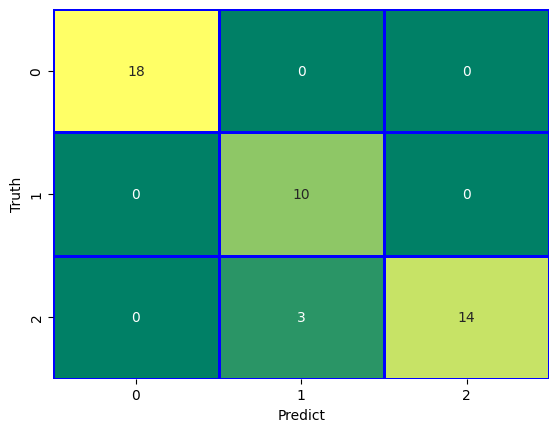

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True, cbar=False, cmap='summer',linewidth=2, linecolor='blue')
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

In [20]:
#SAVING THE TRAINED MODEL

import joblib
model_filename = 'iris_logistic_regression_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved successfully to {model_filename}")

Model saved successfully to iris_logistic_regression_model.joblib
